# **Descrizione Generale**

Questo script genera una grande quantità di numeri casuali compresi tra 0 e 1 e verifica se la loro distribuzione è **uniforme**, cioè se i valori si distribuiscono in modo approssimativamente equo all'interno di suddivisioni (rettangoli o bin) dell’intervallo `[0,1]`. Il comportamento viene misurato calcolando la **devianza percentuale media** rispetto alla media attesa.



Formula utilizzata per calcolare la devianza percentuale media:

$$
\text{DPM} = \frac{1}{B} \sum_{i=1}^{B} \left| \frac{O_i - E}{E} \right| \times 100
$$


- $\ O_i \$: conteggio osservato nel bin \( i \)

- $\ E = \frac{N}{B} \$: conteggio atteso (media teorica per uniformità)

- $\ B \$: numero di bin


### **Installazione delle librerie**

Installa le librerie necessarie:



*   `numpy`: per la generazione di numeri casuali e operazioni vettoriali.
*   `matplotlib`: per la rappresentazione grafica dei dati (istogramma, linea di riferimento, ecc.).








In [ ]:
!pip install numpy matplotlib

### **Importazione dei moduli**

Importa le librerie:



*   `numpy` come `np`: fornisce strumenti per operazioni numeriche efficienti, tra cui generazione di numeri casuali.
*   `matplotlib.pyplot`: modulo per la creazione di grafici e visualizzazioni dei dati.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### **Analisi statistica dell’uniformità di distribuzione e visualizzazione grafica**

La funzione `verifica_uniformita(n_valori, n_rettangoli)`:

*   **Generazione casuale**: crea `n_valori` numeri pseudo-casuali in `[0,1)` tramite `np.random.random()`.
*   **Suddivisione in bin**: usa `np.histogram()` per contare quanti valori cadono in ciascuno dei `n_rettangoli` (suddivisioni equidistanti dell’intervallo).


*   **Calcolo media attesa**: determina la quantità teorica di valori attesa in ogni bin, pari a `n_valori / n_rettangoli`.

*   **Devianza percentuale**: calcola, per ogni bin, lo scostamento percentuale rispetto alla media attesa.

*   **Media della devianza**: restituisce la media aritmetica di tutti gli scostamenti percentuali → misura globale dell’uniformità.

*   **Output testuale**: stampa la devianza media percentuale con due cifre decimali

*   **Visualizzazione grafica**:

    *   istogramma dei conteggi per bin (barre blu)
    *   linea tratteggiata rossa alla quota della media attesa
    *   legenda, assi, titolo e griglia per facilitare l’interpretazione.

In [ ]:
def verifica_uniformita(n_valori: int, n_rettangoli: int):
    valori = np.random.random(n_valori)
    conteggi, _ = np.histogram(valori, bins=n_rettangoli, range=(0.0, 1.0))

    media_attesa = n_valori / n_rettangoli
    devianza_percentuale = np.abs(conteggi - media_attesa) / media_attesa * 100

    devianza_media = np.mean(devianza_percentuale)

    print(f"Devianza media percentuale: {devianza_media:.2f}%")

    plt.bar(range(n_rettangoli), conteggi, width=1.0, edgecolor='blue')
    plt.axhline(media_attesa, color='red', linestyle='--', label='Media attesa')
    plt.title('Distribuzione dei valori casuali')
    plt.xlabel('Rettangolo (bin)')
    plt.ylabel('Conteggio')
    plt.legend()
    plt.show()

### **Esecuzione del test**

*   Chiama la funzione con 1 milione di numeri casuali e 1000 bin.
*   Verifica sperimentalmente la qualità della distribuzione.

È atteso che ciascun bin contenga circa 1000 valori ± piccole fluttuazioni.






Devianza media percentuale: 2.51%


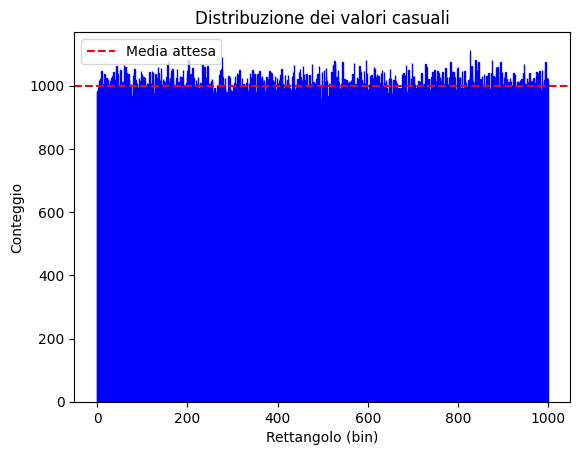

In [ ]:
verifica_uniformita(n_valori=1000000, n_rettangoli=1000)